In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from getpass import getpass
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import chromedriver_autoinstaller as chromedriver
chromedriver.install()
from bs4 import BeautifulSoup
import time
import calendar
import pandas as pd
from selenium.common.exceptions import NoSuchElementException
import os
from io import BytesIO,StringIO
from IPython.display import display,HTML
import pyautogui
from PIL import Image
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [2]:
options = Options()
options.add_argument('start-maximized')
options.add_argument('disable-infobars')

In [3]:
username = input("Enter Username : ")
password = getpass("Enter Password : ")

Enter Username : pagepvtltd_2017
Enter Password : ········


In [4]:
Driver = webdriver.Chrome(options=options,service=Service(ChromeDriverManager().install())) 



INFO:WDM:

====== WebDriver manager ======
INFO:WDM:====== WebDriver manager ======
Current google-chrome version is 102.0.5005
INFO:WDM:Current google-chrome version is 102.0.5005
Get LATEST chromedriver version for 102.0.5005 google-chrome
INFO:WDM:Get LATEST chromedriver version for 102.0.5005 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/102.0.5005.61/chromedriver_win32.zip
INFO:WDM:Trying to download new driver from https://chromedriver.storage.googleapis.com/102.0.5005.61/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\aakas\.wdm\drivers\chromedriver\win32\102.0.5005.61]
INFO:WDM:Driver has been saved in cache [C:\Users\aakas\.wdm\drivers\chromedriver\win32\102.0.5005.61]


In [5]:
Driver.get('https://www.gst.gov.in/')
Driver.find_element(By.XPATH,"//a[contains(text(),' Login')]").click()
time.sleep(1)
Driver.find_element(By.ID,'username').send_keys(username)
time.sleep(1)
Driver.find_element(By.ID,"user_pass").send_keys(password)
time.sleep(1)

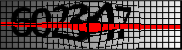

In [6]:
Captcha_Image = Driver.find_element(By.ID,'imgCaptcha').screenshot_as_png
Driver.minimize_window()
Image.open(BytesIO(Captcha_Image))

In [8]:
Driver.find_element(By.ID,'captcha').send_keys(int(input("Enter Above Captcha : ")))
time.sleep(2)
Driver.find_element(By.XPATH,'//button[normalize-space()="Login"]').click()
time.sleep(2)
Driver.find_element(By.XPATH,"//*[@id='adhrtableV']/div/div/div[2]/a[2]").click()
time.sleep(2)  
Driver.find_element(By.XPATH,"//span[text()='Continue to Dashboard']").click()

In [10]:
time.sleep(2)
Driver.find_element(By.XPATH,"//*[@id='main']/ul/li[2]/a").click()
time.sleep(2)
Driver.find_element(By.XPATH,"//a[contains(text(),'Returns')]").click()
time.sleep(3)
Driver.find_element(By.XPATH,"//div[@class='col-xs-12']//a[contains(text(),'Returns Dashboard')]").click()

In [11]:
Driver.find_element(By.XPATH,f"//select[@name='fin']/option[text()='2021-22']").click()
Driver.find_element(By.XPATH,f"//select[@name='quarter']/option[text()='Quarter 1 (Apr - Jun)']").click()
Driver.find_element(By.XPATH,f"//select[@name='mon']/option[text()='June']").click()
time.sleep(2)
Driver.find_element(By.XPATH,".//div[contains(@class,'col-sm-3 col-xs-12')]//button[normalize-space()='Search']").click()

In [13]:
time.sleep(1)
Driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div/div[2]/div[4]/div[4]/div[2]/div[2]/div/a/div/p[2]').click()
time.sleep(1)
Driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div/div[2]/div[1]/div[3]/div[11]/div/div[1]/a/div[1]/p').click()
time.sleep(1)
Driver.find_element(By.XPATH,'//*[@id="iosupAdvisory"]/div/div/div[2]/button').click()

In [14]:
def split(arr, size):
    arrs = []
    while len(arr) > size:
        pice = arr[:size]
        arrs.append(pice)
        arr   = arr[size:]
    arrs.append(arr)
    return arrs

In [15]:
BS = BeautifulSoup(Driver.page_source,'html.parser')

In [46]:
float(BS.find_all('div',class_="rettbl-format")[0].find_all('table')[0].find_all('td')[2].find_all('input')[0]['title'].split(':')[1].split(' ')[1].replace('₹','').replace(',',''))

179752.0

In [41]:
Thr3_a = []
for i in range(len(BS.find_all('div',class_="rettbl-format")[0].find_all('table')[0].find_all('td'))):
    try:
        if BS.find_all('div',class_="rettbl-format")[0].find_all('table')[0].find_all('td')[i]['class'][0] =='gstr3b-blank':
            Thr3_a.append('-')
#             print(BS.find_all('div',class_="rettbl-format")[0].find_all('table')[0].find_all('td')[i])
    except:
        Thr3_a.append(float(BS.find_all('div',class_="rettbl-format")[0].find_all('table')[0].find_all('td')[i].find_all('input')[0]['title'].split(':')[1].split(' ')[1].replace('₹','').replace(',','')))
#         print("No Blank Elements")

In [48]:
O_Supply= pd.read_html(str(BS.find_all('div',class_="rettbl-format")[0].find_all('table')[0]))[0]
for i in range(len(split(Thr3_a,5))):
    O_Supply.iloc[i,1:] = split(Thr3_a,5)[i]
display(HTML(O_Supply.to_html(index=False)))

Nature of Supplies,Total Taxable value (₹),Integrated Tax (₹),Central Tax (₹),State/UT Tax (₹),CESS (₹)
"(a) Outward taxable supplies (other than zero rated, nil rated and exempted)",1997242.0,0.0,179752.0,179752.0,0.0
(b) Outward taxable supplies (zero rated ),0.0,0.0,-,-,0.0
"(c) Other outward supplies (Nil rated, exempted)",585000.0,-,-,-,-
(d) Inward supplies (liable to reverse charge),0.0,0.0,0.0,0.0,0.0
(e) Non-GST outward supplies,0.0,-,-,-,-


In [49]:
O_Supply.dtypes

Nature of Supplies          object
Total Taxable value (₹)    float64
Integrated Tax (₹)          object
Central Tax (₹)             object
State/UT Tax (₹)            object
CESS (₹)                    object
dtype: object

In [18]:
Driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div/div[1]/div[1]/div/ol/li[3]/ng-switch/span/a').click()

In [19]:
Driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div/div[2]/div[1]/div[3]/div[11]/div/div[3]/a/div[1]').click()

In [20]:
BS1 = BeautifulSoup(Driver.page_source,'html.parser')

In [21]:
E_ITC = pd.read_html(str(BS1.find_all('div',class_="rettbl-format")[0].find_all('table')[0]))[0]
E_ITC

,Details,Integrated Tax (₹),Central Tax (₹),State/UT Tax (₹),CESS (₹)
0,(A) ITC Available (whether in full or part),NaN,NaN,NaN,NaN
1,(1) Import of goods,NaN,NaN,NaN,NaN
2,(2) Import of services,NaN,NaN,NaN,NaN
3,(3) Inward supplies liable to reverse charge (...,NaN,NaN,NaN,NaN
4,(4) Inward supplies from ISD,NaN,NaN,NaN,NaN
5,(5) All other ITC,NaN,NaN,NaN,NaN
6,(B) ITC Reversed,NaN,NaN,NaN,NaN
7,(1) As per Rule 42 & 43 of CGST/SGST rules,NaN,NaN,NaN,NaN
8,(2) Others,NaN,NaN,NaN,NaN
9,(C) Net ITC Available (A) - (B),NaN,NaN,NaN,NaN


In [54]:
BS1.find_all('div',class_="rettbl-format")[0].find_all('table')[0].find_all('td')[7]['class'][0]

'gstr3b-blank'

In [62]:
BS1.find_all('div',class_="rettbl-format")[0].find_all('table')[0].find_all('td')

[<td ng-switch="obj.ty">
 <!-- --><span ng-switch-when="IMPG">(1) Import of goods</span><!-- -->
 <!-- -->
 <!-- -->
 <!-- -->
 <!-- -->
 </td>,
 <td ng-class="{'has-error' : (obj.ty !== 'IMPS' &amp;&amp; exdLimit_Elg4itc['itc_elg']['itc_avl'][obj.ty]['iamt'])}">
 <!-- --><input assign-zero="" class="form-control formedit newinv currency ng-pristine ng-untouched ng-valid ng-not-empty" data-formating3b="currency" data-fraction="2" data-ng-change="chkLimit(obj.iamt,'itc_avl',obj.ty,'iamt');calculateNetITC();checkRevChrgCred()" data-ng-if="obj.ty !== 'IMPS'" data-ng-model="obj.iamt" disabled="disabled" id="invval" ng-disabled="disableAll3BF" title="Your amount : ₹0.00   System computed :₹0.00"/><!-- -->
 <!-- -->
 </td>,
 <td class="gstr3b-blank" ng-if="obj.ty === 'IMPG' || obj.ty === 'IMPS'"></td>,
 <td class="gstr3b-blank" ng-if="obj.ty === 'IMPG' || obj.ty === 'IMPS'"></td>,
 <td ng-class="{'has-error' : (obj.ty !== 'IMPS' &amp;&amp; exdLimit_Elg4itc['itc_elg']['itc_avl'][obj.ty]['csam

In [61]:
# BS1.find_all('div',class_="rettbl-format")[0].find_all('table')[0].find_all('td')
for i in range(len(BS1.find_all('div',class_="rettbl-format")[0].find_all('table')[0].find_all('td'))):
    try:
        print(BS1.find_all('div',class_="rettbl-format")[0].find_all('table')[0].find_all('td')[i].find_all('input')[0]['title'])
    except:
        try:
            if BS1.find_all('div',class_="rettbl-format")[0].find_all('table')[0].find_all('td')[i]['class'][0]== 'gstr3b-blank':
                print(BS1.find_all('div',class_="rettbl-format")[0].find_all('table')[0].find_all('td')[i])
        except:
            print('No')

No
Your amount : ₹0.00   System computed :₹0.00
<td class="gstr3b-blank" ng-if="obj.ty === 'IMPG' || obj.ty === 'IMPS'"></td>
<td class="gstr3b-blank" ng-if="obj.ty === 'IMPG' || obj.ty === 'IMPS'"></td>
Your amount : ₹0.00   System computed :₹0.00
No
No
<td class="gstr3b-blank" ng-if="obj.ty === 'IMPG' || obj.ty === 'IMPS'"></td>
<td class="gstr3b-blank" ng-if="obj.ty === 'IMPG' || obj.ty === 'IMPS'"></td>
No
No
Your amount : ₹0.00   System computed :₹0.00
Your amount : ₹0.00   System computed :₹0.00
Your amount : ₹0.00   System computed :₹0.00
Your amount : ₹0.00   System computed :₹0.00
No
Your amount : ₹0.00   System computed :₹0.00
Your amount : ₹0.00   System computed :₹0.00
Your amount : ₹0.00   System computed :₹0.00
Your amount : ₹0.00   System computed :₹0.00
No
Your amount : ₹808.00   System computed :₹808.25
Your amount : ₹0.00   System computed :₹0.00
Your amount : ₹0.00   System computed :₹0.00
Your amount : ₹0.00   System computed :₹0.00
No
No
No
No
No
No
Your amount : ₹

In [31]:
# BS1.find_all('div',class_="rettbl-format")[0].find_all('table')[0].find_all('td')
for i in range(len(BS1.find_all('div',class_="rettbl-format")[0].find_all('table')[0].find_all('td'))):
    try:
        print(BS1.find_all('div',class_="rettbl-format")[0].find_all('table')[0].find_all('td')[i].find_all('input')[0]['title'])
    except:
        print('No')

No
Your amount : ₹0.00   System computed :₹0.00
No
No
Your amount : ₹0.00   System computed :₹0.00
No
No
No
No
No
No
Your amount : ₹0.00   System computed :₹0.00
Your amount : ₹0.00   System computed :₹0.00
Your amount : ₹0.00   System computed :₹0.00
Your amount : ₹0.00   System computed :₹0.00
No
Your amount : ₹0.00   System computed :₹0.00
Your amount : ₹0.00   System computed :₹0.00
Your amount : ₹0.00   System computed :₹0.00
Your amount : ₹0.00   System computed :₹0.00
No
Your amount : ₹808.00   System computed :₹808.25
Your amount : ₹0.00   System computed :₹0.00
Your amount : ₹0.00   System computed :₹0.00
Your amount : ₹0.00   System computed :₹0.00
No
No
No
No
No
No
Your amount : ₹0.00   System computed :₹0.00
Your amount : ₹0.00   System computed :₹0.00
Your amount : ₹0.00   System computed :₹0.00
Your amount : ₹0.00   System computed :₹0.00
No
No
No
No
No
No
No
No
No
No
No
No
No
No


In [33]:
# eitc = []
for i in range(len(BS1.find_all('div',class_="rettbl-format")[0].find_all('table')[0].find_all('td'))):
    try:
        if BS1.find_all('div',class_="rettbl-format")[0].find_all('table')[0].find_all('td')[i]['class'][0] =='gstr3b-blank':
            print(BS1.find_all('div',class_="rettbl-format")[0].find_all('table')[0].find_all('td')[i])
#             eitc.append('-')
    except:
        print(BS1.find_all('div',class_="rettbl-format")[0].find_all('table')[0].find_all('td')[i].find_all('input')[0]['title'].split(':')[-1].replace('₹','').replace(',',''))

IndexError: list index out of range

In [188]:
eitc

[]